# Cow Solver Exploratory Notebook

This notebook examines the `cow_chain_df`, which is a dataset that combines chainlink prices with the cow solver's swap data.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ..

/home/evan/Documents/github/Feedlot


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
#display as integer format
# pd.options.display.float_format = '{:,.0f}'.format # display as dollar currency

In [4]:
# load cow swaps dataset
cow_chain_df = pd.read_csv('data/transformed/cow_chain_swaps.csv', low_memory=False)

In [6]:
# add buyAmountEthUSD and sellAmountEthUSD columns
cow_chain_df['buyAmountChainPrice'] = cow_chain_df['buyAmountEth'] * cow_chain_df['eth_chain_price']
cow_chain_df['sellAmountChainPrice'] = cow_chain_df['sellAmountEth'] * cow_chain_df['eth_chain_price']

In [7]:
# filter cow_chain_df for active = True and environment = 'prod'
active_cow_solvers_df = cow_chain_df[(cow_chain_df['environment'] == 'prod')]

In [8]:
active_cow_solvers_df.head(10)

,timestamp_x,gasPrice,feeAmount,txHash,settlement,buyAmount,sellAmount,order,buyAmountEth,sellAmountEth,buyAmountUsd,sellAmountUsd,solvers,environment,name,active,sellTokenSymbol,sellTokenDecimals,buyTokenSymbol,buyTokenDecimals,date,id,assetPair_id,eth_chain_timestamp,price_x,timestamp,eth_chain_price,buyAmountChainPrice,sellAmountChainPrice
158,1628678987,56250000001,84264832265841888,0x6d53a6335e0867b14f15fff45848de9f8295d6d1271ee08bf0478d213c48eea7,0x6d53a6335e0867b14f15fff45848de9f8295d6d1271ee08bf0478d213c48eea7,142340228785867909,2000000000000000000,0x29c76b5c6cce5d2cf5deaedbef0a99edd638241615b9ebbacdd899b90c46cf2eb54872859733a3dfbb2c5401ac68cd9ca84b3cd16113add4,0.142340,0.149531,458.596245,470.328171,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,GNO,18,WETH,18,2021-08-11 10:49:47,ETH/USD/0x6113ac96,WETH/USD,1.628679e+09,3229.986077,1628679318,3229.986077,459.756957,482.982769
159,1628679390,54000000001,5673462054320000,0xa6ef18ea9f60dcfcc99edb78a42058d245a59ba279cc0be5ea6617e6f1d3ac10,0xa6ef18ea9f60dcfcc99edb78a42058d245a59ba279cc0be5ea6617e6f1d3ac10,13910158592529569235,10000000000000000,0x37780ba3ddac3f8c685215f67e9faa0547e0fbd1d2186941b79d3330d0ef6456424a46612794dbb8000194937834250dc723ffa56113b3d7,0.004317,0.010000,13.910159,32.218316,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,WETH,18,DAI,18,2021-08-11 10:56:30,ETH/USD/0x6113ac96,WETH/USD,1.628679e+09,3229.986077,1628679318,3229.986077,13.945365,32.299861
160,1628679390,54000000001,5673462054320000,0xa6ef18ea9f60dcfcc99edb78a42058d245a59ba279cc0be5ea6617e6f1d3ac10,0xa6ef18ea9f60dcfcc99edb78a42058d245a59ba279cc0be5ea6617e6f1d3ac10,13910158592529569235,10000000000000000,0x37780ba3ddac3f8c685215f67e9faa0547e0fbd1d2186941b79d3330d0ef6456424a46612794dbb8000194937834250dc723ffa56113b3d7,0.004317,0.010000,13.910159,32.218316,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,WETH,18,DAI,18,2021-08-11 10:56:30,DAI/USD/0x6113b2ad,DAI/USD,1.628681e+09,1.000712,1628679318,3229.986077,13.945365,32.299861
161,1628679675,55722420315,21482975456898875392,0x47567c2b75f386bfb4185df7acdad314d5f55bb131dfac1ec0c465b4a2803403,0x47567c2b75f386bfb4185df7acdad314d5f55bb131dfac1ec0c465b4a2803403,23965825340235405,125286403281475055694,0xa2bbae3b868d52e5f895ce2d2133bc9e5abcc418029c35e2b948669e67049c628bc0fe84022542e1611ff252090028df741ad6706113ae46,0.023966,0.028832,77.213853,92.892069,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,BAT,18,NaN,18,2021-08-11 11:01:15,BAT/USD/0x6113b31f,BAT/USD,1.628681e+09,0.751133,1628679318,3229.986077,77.409282,93.127180
162,1628680192,59000001211,24297921,0x481b292763f5d7c764ea6da868d0f66ba7b1d507dc6f134fddeee48a7cece9ce,0x481b292763f5d7c764ea6da868d0f66ba7b1d507dc6f134fddeee48a7cece9ce,4911825510798859,40198500,0x88e0ffd8e1ef4c5bcb050373f6bb2d59d36ad16ada7a4eac40c2fe14775ec81b85162b355eee83ed8d29c3cada25b80ca86e80d16113b6df,0.004912,0.012452,15.856184,40.198500,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,USDC,6,NaN,18,2021-08-11 11:09:52,USDC/USD/0x61140b6e,USDC/USD,1.628704e+09,0.999762,1628679318,3229.986077,15.865128,40.221174
163,1628680767,60412500001,915718684922988672,0x8047b6ea41cec7b9a7e3d7a1d2af9773fbd70974ccb2c8d62c740e1dfc8c195b,0x8047b6ea41cec7b9a7e3d7a1d2af9773fbd70974ccb2c8d62c740e1dfc8c195b,21765515837645717,10000000000000000000,0x891061dc40c00f75ee86457628f29fdf0ab2657ab72e7be7d42ff6afc15e041f6cf5ba860c43dbeca7193dd0fe9024cedc8e53156113b8f2,0.021766,0.023941,70.348963,77.132902,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,RUNE,18,NaN,18,2021-08-11 11:19:27,RUNE/USD/0x6113b05d,RUNE/USD,1.628680e+09,7.579438,1628679318,3229.986077,70.302313,77.328126
164,1628680767,60412500001,2257861302266666,0x8047b6ea41cec7b9a7e3d7a1d2af9773fbd70974ccb2c8d62c740e1dfc8c195b,0x8047b6ea41cec7b9a7e3d7a1d2af9773fbd70974ccb2c8d62c740e1dfc8c195b,641872244693784188,50000000000000000,0x422e3fed47eba0ab68b8553e88e2b992365f129d91c403ad3d6f442ab7ff8bbd08d303ac41327258492b1ff85

In [9]:
# Subgraph data reveals inaccuracies with a similar SQL query from Dune - V2: Ranked Active Solvers https://dune.com/queries/1756858/2896548
active_cow_solvers_df.groupby(['name', 'solvers']).size().sort_values(ascending=False)

name                solvers                                   
Gnosis_0x           0xe92f359e6f05564849afa933ce8f62b8007a1d5d    59473
Legacy              0xa6ddbd0de6b310819b49f680f65871bee85f517e    44349
Otex                0xc9ec550bea1c64d779124b23a26292cc223327b6    37935
PLM                 0x149d0f9282333681ee41d30589824b2798e9fb47    32799
Gnosis_1inch        0xde1c59bc25d806ad9ddcbe246c4b5e5505645718    28634
QuasiModo           0x77ec2a722c2393d3fd64617bbaf1499c713e616b    27303
DexCowAgg           0x2d15894fac906386ff7f4bd07fceac43fcf80c73    17034
Laertes             0xa21740833858985e4d801533a808786d3647fb83    17024
Gnosis_1inch        0xb20b86c4e6deeb432a22d773a221898bbbd03036    15295
Gnosis_ParaSwap     0x15f4c337122ec23859ec73bec00ab38445e45304    14657
MIP                 0xf2d21ad3c88170d4ae52bbbeba80cb6078d276f4    12113
QuasiModo           0x731a0a8ab2c6fcad841e82d06668af7f18e34970     8871
Otex                0x6fa201c3aff9f1e4897ed14c7326cf27548d9c35     7073
N

In [10]:
# find most common buy tokens
active_cow_solvers_df.groupby(['name', 'solvers', 'buyTokenSymbol']).size().sort_values(ascending=False).head(10)

name          solvers                                     buyTokenSymbol
Gnosis_0x     0xe92f359e6f05564849afa933ce8f62b8007a1d5d  USDC              16294
Otex          0xc9ec550bea1c64d779124b23a26292cc223327b6  USDC              12075
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  USDC              11020
Legacy        0xa6ddbd0de6b310819b49f680f65871bee85f517e  USDC              10703
Gnosis_1inch  0xde1c59bc25d806ad9ddcbe246c4b5e5505645718  USDC               8793
QuasiModo     0x77ec2a722c2393d3fd64617bbaf1499c713e616b  USDC               7634
Legacy        0xa6ddbd0de6b310819b49f680f65871bee85f517e  WETH               5991
Gnosis_1inch  0xb20b86c4e6deeb432a22d773a221898bbbd03036  USDC               5601
Gnosis_0x     0xe92f359e6f05564849afa933ce8f62b8007a1d5d  WETH               5578
Laertes       0xa21740833858985e4d801533a808786d3647fb83  USDC               5417
dtype: int64

In [11]:
# find most common sell tokens
active_cow_solvers_df.groupby(['name', 'solvers', 'sellTokenSymbol']).size().sort_values(ascending=False).head(10)

name          solvers                                     sellTokenSymbol
Gnosis_0x     0xe92f359e6f05564849afa933ce8f62b8007a1d5d  WETH               15960
Legacy        0xa6ddbd0de6b310819b49f680f65871bee85f517e  WETH               15600
Gnosis_0x     0xe92f359e6f05564849afa933ce8f62b8007a1d5d  USDC               12383
Otex          0xc9ec550bea1c64d779124b23a26292cc223327b6  USDC               10309
                                                          WETH               10268
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  USDC                9516
QuasiModo     0x77ec2a722c2393d3fd64617bbaf1499c713e616b  WETH                9352
Legacy        0xa6ddbd0de6b310819b49f680f65871bee85f517e  USDC                9304
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  WETH                8791
Gnosis_1inch  0xde1c59bc25d806ad9ddcbe246c4b5e5505645718  USDC                6869
dtype: int64

In [12]:
# Find the most active buy and sell token symbols
cow_buy = active_cow_solvers_df.groupby(['name', 'solvers', 'buyTokenSymbol']).size().sort_values(ascending=False)
cow_sell = active_cow_solvers_df.groupby(['name', 'solvers', 'sellTokenSymbol']).size().sort_values(ascending=False)

In [13]:
# join two series together with concat
cow_buy_sell_vol = pd.concat([cow_buy, cow_sell], axis=1)
cow_buy_sell_vol.columns = ['buyTokenSymbol', 'sellTokenSymbol']

In [14]:
cow_buy_sell_vol.size

10030

In [15]:
cow_buy_sell_vol # sample_df shows each solver's highest buy/sell dollar values for each token with over 1M in volume.

buyTokenSymbol  sellTokenSymbol
name         solvers                                                                          
Gnosis_0x    0xe92f359e6f05564849afa933ce8f62b8007a1d5d USDC          16294.0          12383.0
Otex         0xc9ec550bea1c64d779124b23a26292cc223327b6 USDC          12075.0          10309.0
PLM          0x149d0f9282333681ee41d30589824b2798e9fb47 USDC          11020.0           9516.0
Legacy       0xa6ddbd0de6b310819b49f680f65871bee85f517e USDC          10703.0           9304.0
Gnosis_1inch 0xde1c59bc25d806ad9ddcbe246c4b5e5505645718 USDC           8793.0           6869.0
...                                                                       ...              ...
                                                        XI                NaN              1.0
PLM          0x149d0f9282333681ee41d30589824b2798e9fb47 MON               NaN              1.0
Gnosis_1inch 0xde1c59bc25d806ad9ddcbe246c4b5e5505645718 WFLOW             NaN              1.0
                                                        VOLT              NaN              1.0
Laertes      0xa21740833858985e4d801533a808786d3647fb83 CUBE              NaN              1.0

[5015 rows x 2 columns]

In [16]:
# add a new column that subtracts sellAmount from buyAmount
cow_buy_sell_vol['net_token_count'] = cow_buy_sell_vol['buyTokenSymbol'] - cow_buy_sell_vol['sellTokenSymbol']

In [17]:
# drop NaN rows
cow_buy_sell_vol = cow_buy_sell_vol.dropna()

In [18]:
# sort gnosis 1 inch by largest 
cow_buy_sell_vol.loc['QuasiModo'].sort_values(by='net_token_count', ascending=False)

buyTokenSymbol  sellTokenSymbol  net_token_count
solvers                                                                                           
0x77ec2a722c2393d3fd64617bbaf1499c713e616b GNO            1261.0            164.0           1097.0
                                           USDC           7634.0           6585.0           1049.0
0x731a0a8ab2c6fcad841e82d06668af7f18e34970 USDC           3071.0           2423.0            648.0
                                           USDT            970.0            515.0            455.0
0x77ec2a722c2393d3fd64617bbaf1499c713e616b WBTC            542.0            204.0            338.0
...                                                          ...              ...              ...
                                           ENS              95.0            354.0           -259.0
                                           CVX             469.0            750.0           -281.0
                                           SPELL            93.0            399.0           -306.0
0x731a0a8ab2c6fcad841e82d06668af7f18e34970 WETH            762.0           3123.0          -2361.0
0x77ec2a722c2393d3fd64617bbaf1499c713e616b WETH           3552.0           9352.0          -5800.0

[259 rows x 3 columns]

Text(0.5, 0, 'token symbol')

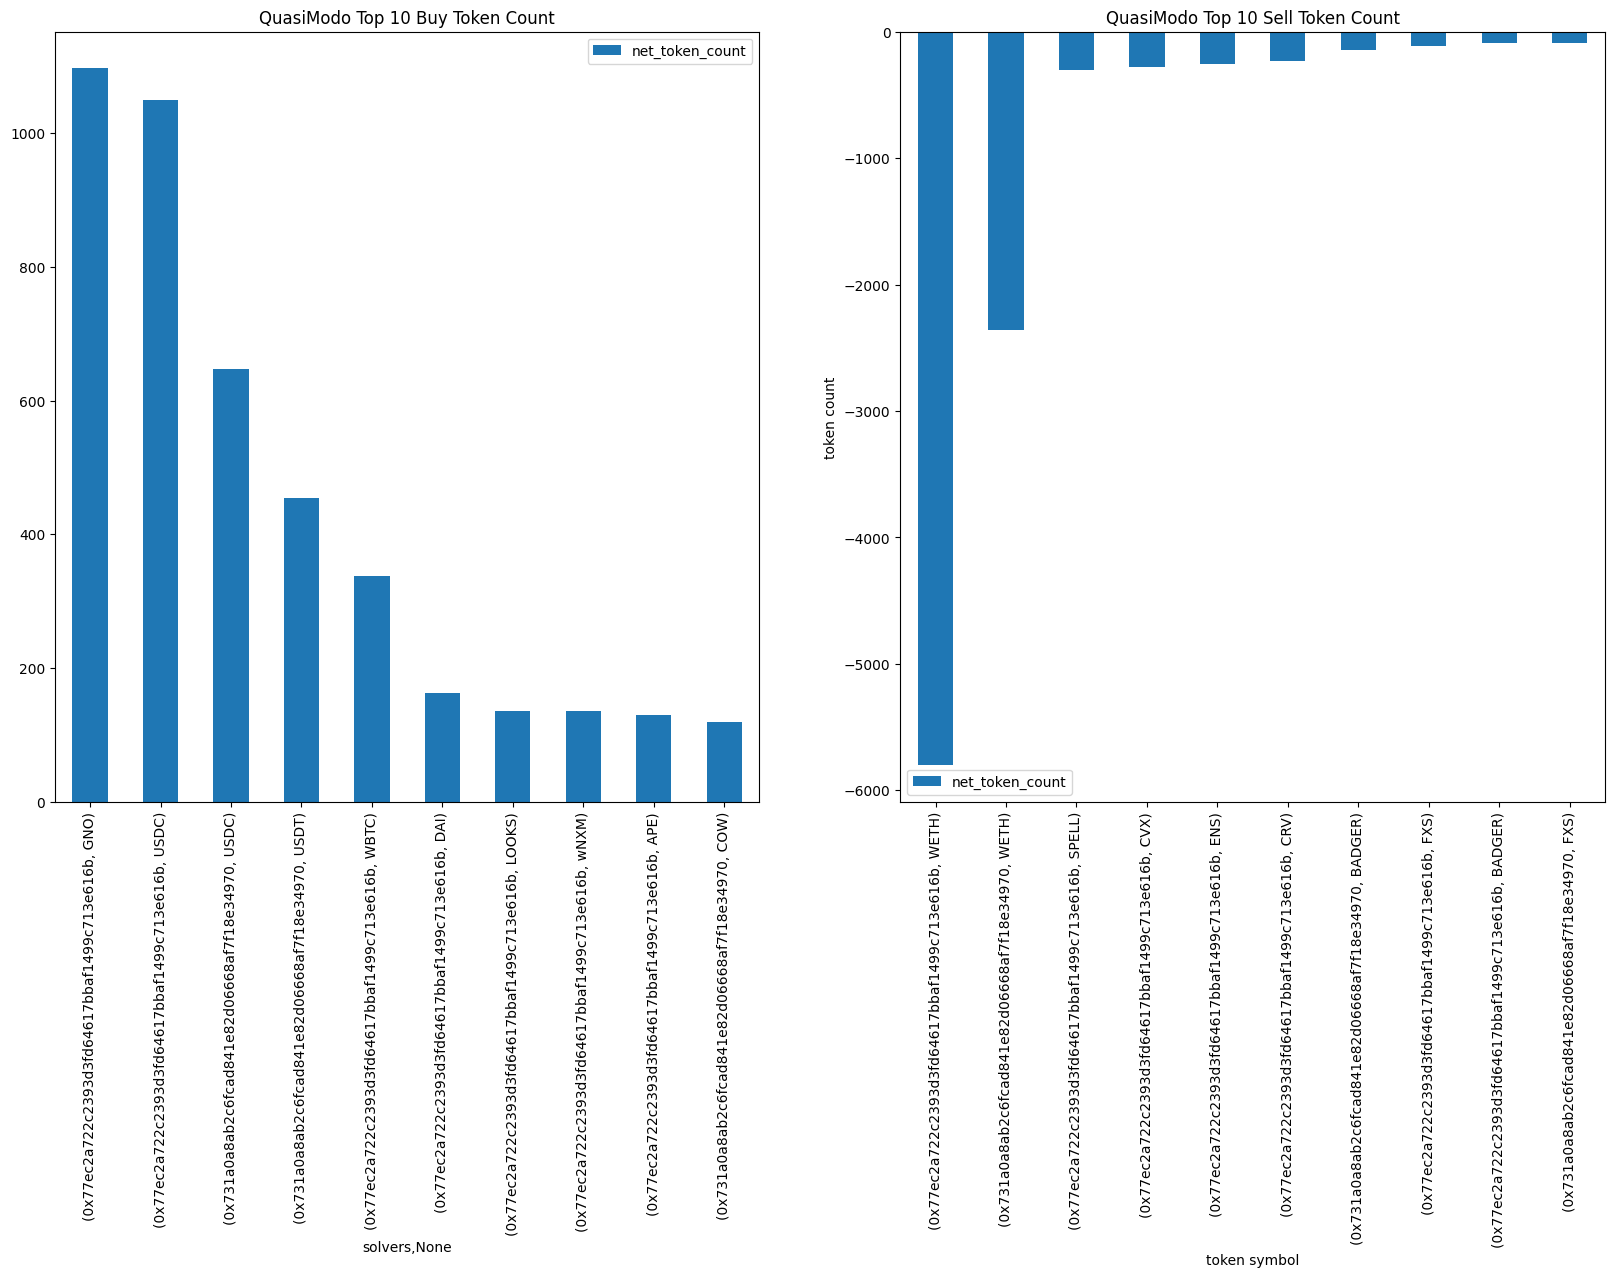

In [19]:
# plot the following two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

cow_buy_sell_vol.loc['QuasiModo'].sort_values(by='net_token_count', ascending=False).head(10).plot(kind='bar', y='net_token_count', ax=ax1, title='QuasiModo Top 10 Buy Token Count')
cow_buy_sell_vol.loc['QuasiModo'].sort_values(by='net_token_count', ascending=True).head(10).plot(kind='bar', y='net_token_count', ax=ax2, title='QuasiModo Top 10 Sell Token Count')

plt.ylabel('token count')
plt.xlabel('token symbol')

### Group by Orders

In [20]:
# find most common sell tokens
active_cow_solvers_df.groupby(['name', 'solvers', 'order']).size().sort_values(ascending=False)

name       solvers                                     order                                                                                                             
QuasiModo  0x77ec2a722c2393d3fd64617bbaf1499c713e616b  0x6c433117175d075d3b29ae97b84a6ceb810c7e863a56323503f8d5da7efb1655042b32ac6b453485e357938bdc38e0340d4b927661c1b02a    164
                                                       0x4a3927813f512fcc6ba710ee44d2a9204d21e997c5c122a60d1d4a2106fdd848042b32ac6b453485e357938bdc38e0340d4b927661c2639b     18
                                                       0x68cfcbfd137658f1dc218799b84ced56cfd2a98cc1246bd0821e9f4374a8a839042b32ac6b453485e357938bdc38e0340d4b927661c1af3f     10
                                                       0xcd7d287522bced335060b9b8018fda3d1b553bf1d3f543fec0436f99c8b12a21042b32ac6b453485e357938bdc38e0340d4b927661c1afa0     10
Legacy     0xa6ddbd0de6b310819b49f680f65871bee85f517e  0x023b1b85cb15a7b80f691fce012e3d01e2daf2117ea44d23bc94909eb24f4241c

In [27]:
# search for this order '0x6c433117175d075d3b29ae97b84a6ceb810c7e863a56323503f8d5da7efb1655042b32ac6b453485e357938bdc38e0340d4b927661c1b02a'
active_cow_solvers_df[active_cow_solvers_df['order'] == '0x6c433117175d075d3b29ae97b84a6ceb810c7e863a56323503f8d5da7efb1655042b32ac6b453485e357938bdc38e0340d4b927661c1b02a']

,timestamp_x,gasPrice,feeAmount,txHash,settlement,buyAmount,sellAmount,order,buyAmountEth,sellAmountEth,buyAmountUsd,sellAmountUsd,solvers,environment,name,active,sellTokenSymbol,sellTokenDecimals,buyTokenSymbol,buyTokenDecimals,date,id,assetPair_id,eth_chain_timestamp,price_x,timestamp,eth_chain_price,buyAmountChainPrice,sellAmountChainPrice
15059,1631435201,57000000000,9689921375466666,0x062e113427526945abd15790bad2bb90185e33b686d04ed7b410ffa9d9707ba3,0x062e113427526945abd15790bad2bb90185e33b686d04ed7b410ffa9d9707ba3,75859323,32000000000000000,0x023b1b85cb15a7b80f691fce012e3d01e2daf2117ea44d23bc94909eb24f4241c0bf5b5fa81b946f511d929175d4139989cfff23613dc077,0.022247,0.032,75.859323,109.115085,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,WETH,18,USDC,6,2021-09-12 08:26:41,USDC/USD/0x613e3d65,USDC/USD,1.631469e+09,0.999954,1631435052,3414.017709,75.952122,109.248567
15060,1631435201,57000000000,9689921375466666,0x062e113427526945abd15790bad2bb90185e33b686d04ed7b410ffa9d9707ba3,0x062e113427526945abd15790bad2bb90185e33b686d04ed7b410ffa9d9707ba3,75859323,32000000000000000,0x023b1b85cb15a7b80f691fce012e3d01e2daf2117ea44d23bc94909eb24f4241c0bf5b5fa81b946f511d929175d4139989cfff23613dc077,0.022247,0.032,75.859323,109.115085,0xa6ddbd0de6b310819b49f680f65871bee85f517e,prod,Legacy,False,WETH,18,USDC,6,2021-09-12 08:26:41,ETH/USD/0x613db92c,WETH/USD,1.631435e+09,3414.017709,1631435052,3414.017709,75.952122,109.248567


In [23]:
# convert 1640041402 to datetime
import datetime
datetime.datetime.fromtimestamp(1640041402)

datetime.datetime(2021, 12, 20, 18, 3, 22)

In [24]:
datetime.datetime.fromtimestamp(1640079924)

datetime.datetime(2021, 12, 21, 4, 45, 24)

 ### Show Chainlink last prices for each assetPair.

In [6]:
# get most recent assetPair prices by date. Print most current date
asset_pair_prices = cow_chain_df.groupby(['assetPair_id']).agg({'price': 'last', 'date': 'last'})

In [7]:
# sort by date and print top 50
asset_pair_prices.sort_values(by=['date'], ascending=False).head(50)

,price,date
assetPair_id,,
USDT/USD,0.999500,2022-12-30 17:29:11
UNI/USD,5.089000,2022-12-30 17:21:23
WBTC/USD,16532.045927,2022-12-30 16:56:23
APE/USD,3.577936,2022-12-30 16:56:23
DAI/USD,1.000098,2022-12-30 16:56:23
WETH/USD,1194.280000,2022-12-30 16:49:47
USDC/USD,1.000063,2022-12-30 16:37:11
FXS/USD,4.233306,2022-12-30 16:21:11
CRV/USD,0.512064,2022-12-30 16:21:11
